<a href="https://colab.research.google.com/github/summerolmstead/Customer-Segmentation-Analysis/blob/main/Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Summer Olmstead

Assignment 2 of Data Visualization| Dataset 1 - 4 Attributes

Customer Segmentation Analysis - use of PCA

# Downloading Data from Kaggle

In [1]:
import kagglehub
import os

path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1


https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [2]:
dataset_files = os.listdir(path)
print("Dataset files:", dataset_files)

Dataset files: ['Mall_Customers.csv']


In [3]:
import pandas as pd

csv_file_path = os.path.join(path, 'Mall_Customers.csv')
df = pd.read_csv(csv_file_path)

print(df.head()) #here we can see our customer ID(identifer), gender, age, annual income, and spending score attribute.

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Background with attributes: The k$ for annual income likely stands for thousand USD. ex a person with a value of 50 has 50,000 USD annually.The spending score is assigned by the mall based on customer behavior and spending nature to add perspective.

# Data Cleaning

In [5]:
# first checking for null values or nan
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [6]:
#lets check for outliers!
#function for detecting outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25) # caclulating 1st quartile
    Q3 = df[column].quantile(0.75) # caclulating 3nd quartile
    IQR = Q3 - Q1 #interquartile range difference between q3 and q1
    #calculating bounds of what makes something an outlier or not
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# each numerical column needs this function to see outliers - therefore we wouldnt need to do it with like gender assuming there are only two categorical outputs in our dataset
outliers_age = detect_outliers(df, 'Age')
outliers_income = detect_outliers(df, 'Annual Income (k$)')
outliers_spending = detect_outliers(df, 'Spending Score (1-100)')

# combine all outliers into one DataFrame
outliers = pd.concat([outliers_age, outliers_income, outliers_spending]).drop_duplicates()

print("Number of outliers:", len(outliers))
print("Outliers:")
print(outliers) #given the outliers are just high earners it appears we maybe should keep it in - if we see later on it being an issue we can remove these outliers

Number of outliers: 2
Outliers:
     CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)
198         199   Male   32                 137                      18
199         200   Male   30                 137                      83


In [7]:
# one hot encode the gender column bc its categorical values!
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)

print(df_encoded.head())

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0           1   19                  15                      39         True
1           2   21                  15                      81         True
2           3   20                  16                       6        False
3           4   23                  16                      77        False
4           5   31                  17                      40        False


In [8]:
from sklearn.preprocessing import StandardScaler
# scale the numerical features for normalization for PCA
#using standard scaler for PCA because PCA is for dimensionality reduction so its more sensitive to the variance of each feature this scaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']])
# create a df for easier manipulation with result
scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male'])
print(scaled_df.head())

        Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0 -1.424569           -1.738999               -0.434801     1.128152
1 -1.281035           -1.738999                1.195704     1.128152
2 -1.352802           -1.700830               -1.715913    -0.886405
3 -1.137502           -1.700830                1.040418    -0.886405
4 -0.563369           -1.662660               -0.395980    -0.886405


# Basic variable scatterplots to see potential similarities with the PCA graph

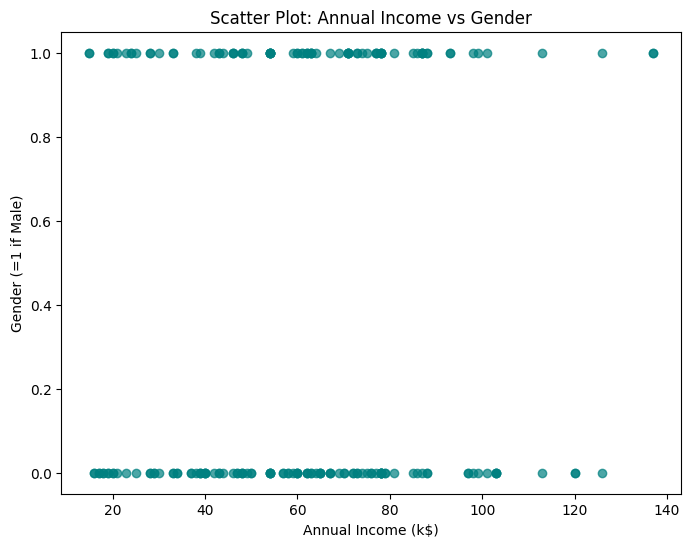

In [9]:
#scatter plot between two features, lets first try Annual Income and Spending Score and we will use the scaled data too bc normalizaton is good across features to have it in same scale to see relationship
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_encoded['Annual Income (k$)'], df_encoded['Gender_Male'], color='teal', alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Gender (=1 if Male)')
plt.title('Scatter Plot: Annual Income vs Gender')
plt.show()

These results intuitively make sense because we have a categorical variable in there (Gender) and there is only two answers - therefore, we can see the resultig line if female or male. I did want to do this combo as in the PCA we see these were highly impactful on PC2.

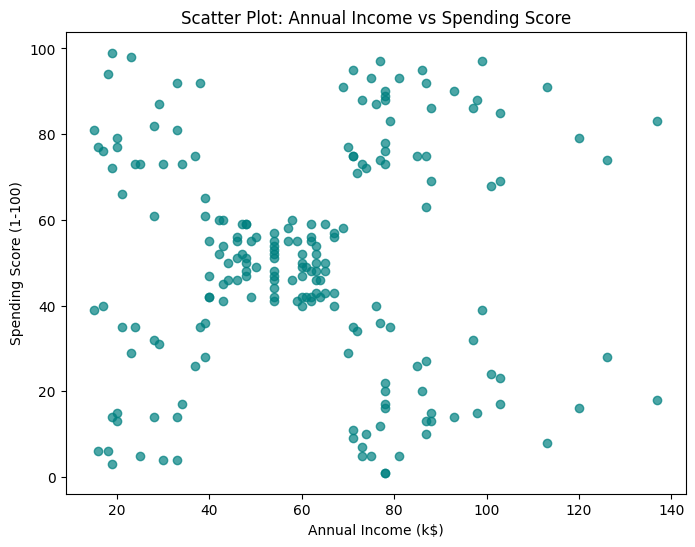

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color='teal', alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot: Annual Income vs Spending Score')
plt.show()

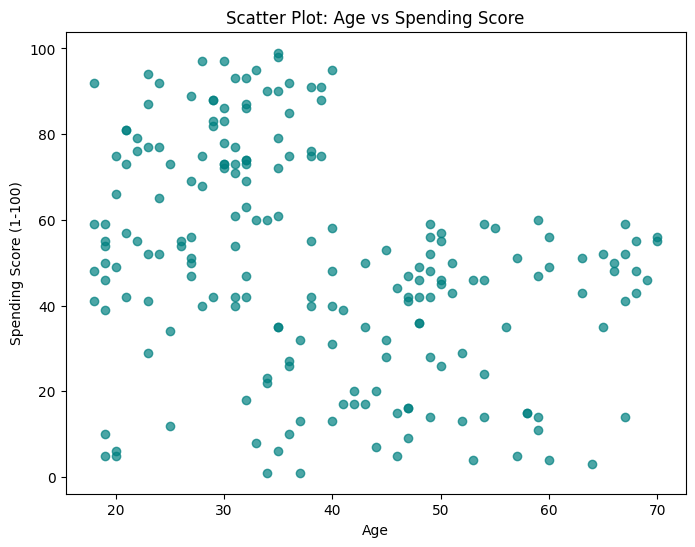

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Spending Score (1-100)'], color='teal', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot: Age vs Spending Score')
plt.show()

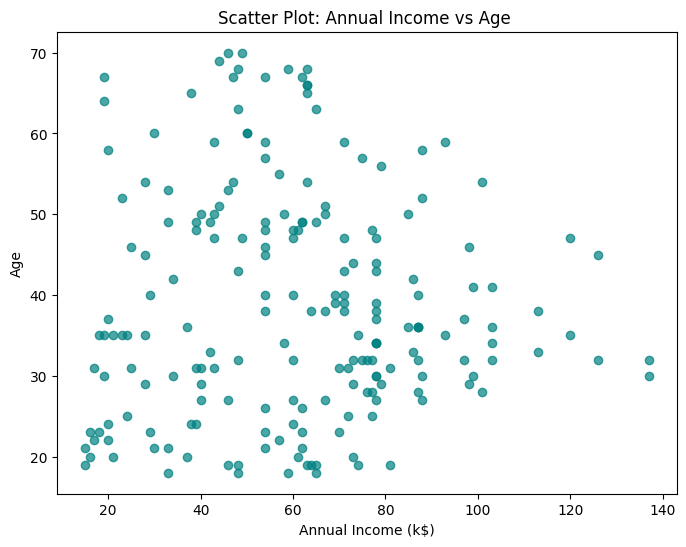

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Age'], color='teal', alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.title('Scatter Plot: Annual Income vs Age ')
plt.show() # this probably makes more sense to just visually see without being scaled so ill take it out lol -> same as k means later

# PCA (Principle Component Analysis)

In [13]:
from sklearn.decomposition import PCA

# apply PCA to reduce the data to 2 dimensions (PC1 and PC2)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df)
# print the principal components (coefficients of the original features)
print(pca.components_) # same order of age,annual income, spending score, gender_male

# create a DataFrame for the PCA components
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
print(pca_df.head()) # seeing the pca df head

[[ 0.68790025 -0.00608217 -0.68691996  0.23430156]
 [-0.10368955  0.7652519   0.10321115  0.62688553]]
        PC1       PC2
0 -0.406383 -0.520714
1 -1.427673 -0.367310
2  0.050761 -1.894068
3 -1.694513 -1.631908
4 -0.313108 -1.810483


Here we can see that for PCA 1 age with .69 with a positive effect on the PCA and spending score coefficient -.69 both have the most impact on PC1 - meaning as age increases the increases the PC1 whereas as as spending score increases PC1 decreases.

Furthermore, for PC2 we see that annual income and gender_male are the most impactful where annual income has a positive coefficient of .77 and gender_male has a coefficient of .63. Intuitively perhaps men do get paid more than women - ex: wage gap - so this could be conveyed in the data.

In [14]:
# the explained variance ratio -> how much each component explains the variance
print(pca.explained_variance_ratio_)

[0.33690046 0.26230645]


With our results, we see that 33.69% of the variance is explained by PC1 whereas 26.23`% of the variance is explained by PC2.

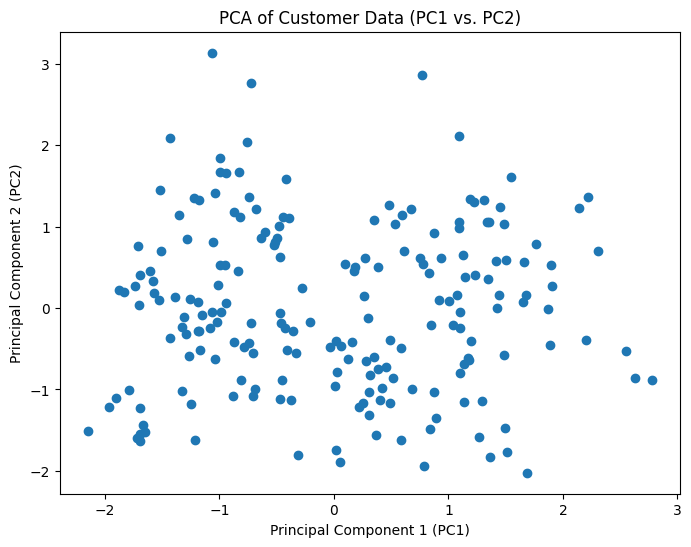

In [15]:
# plot the PCA result: PC1 vs. PC2 (scatter plot)
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA of Customer Data (PC1 vs. PC2)')
plt.show()

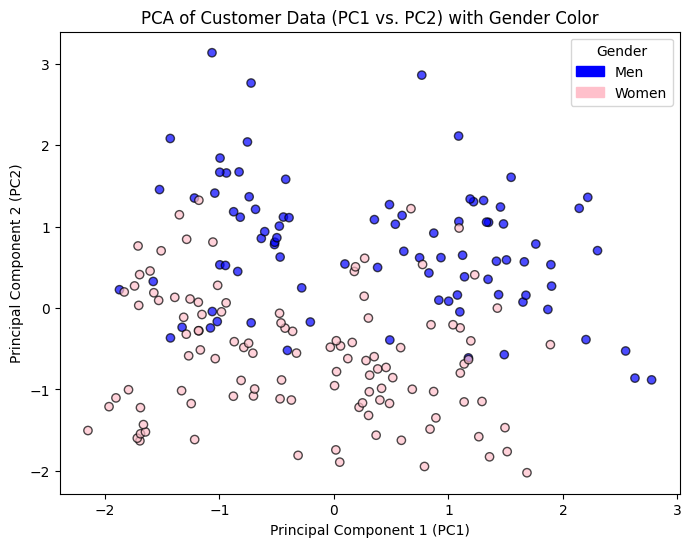

In [16]:
#lets be able to see the gender for each point to see if we can visualize the PCA better
# gender information to the PCA DataFrame for color coding
df_encoded['Cluster'] = df_encoded['Gender_Male'].apply(lambda x: 'Male' if x == 1 else 'Female')

# a color map for gender: men as blue, women as pink
gender_colors = df_encoded['Cluster'].map({'Male': 'blue', 'Female': 'pink'})

# plot PCA results with color coding based on gender
plt.figure(figsize=(8, 6))

# scatter plot with colors mapped to gender
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=gender_colors, alpha=0.7, edgecolors='k')

# adding labels and title
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA of Customer Data (PC1 vs. PC2) with Gender Color')

# display a legend for gender
import matplotlib.patches as mpatches
male_patch = mpatches.Patch(color='blue', label='Men')
female_patch = mpatches.Patch(color='pink', label='Women')
plt.legend(handles=[male_patch, female_patch], title="Gender")
plt.show()

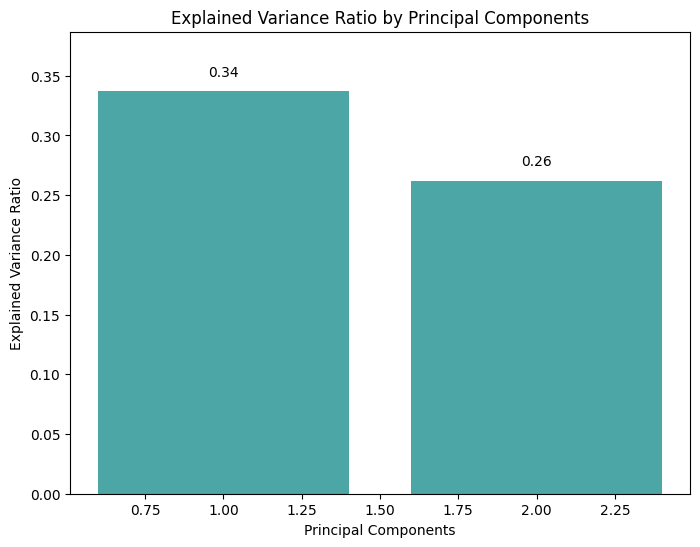

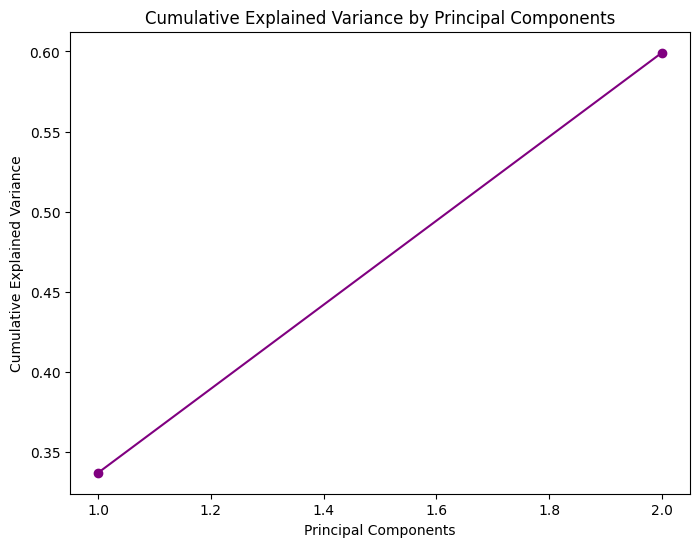

Unexplained variance: 0.40


In [17]:
#lets visualize the variance explained bby our PCA analysis
# get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# plot the explained variance ratio for each principal component
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='teal', alpha=0.7)#plot for pc1 and pc2
plt.ylim(0, max(explained_variance_ratio) + 0.05)  # adds extra space at the top of the chart bc issue of total for bar running into top line of graph
plt.xlabel('Principal Components') # labeling plot
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
# annotate text for PC1 and PC2
for i, var in enumerate(explained_variance_ratio):
    plt.text(i + 1, var + 0.01, f'{var:.2f}', ha='center', va='bottom', fontsize=10)
plt.show()

# calculate and plot the cumulative explained variance
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum() #cumlative sum function

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', color='purple') # plotting cumulative explained var from our pca!
plt.xlabel('Principal Components')#labeling
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.show()

unexplained_variance = 1 - cumulative_explained_variance[-1]  # unexplained variance after conducting the PCA
print(f"Unexplained variance: {unexplained_variance:.2f}")


# K Means Clustering

Age vs Spending Score K Means Clustering

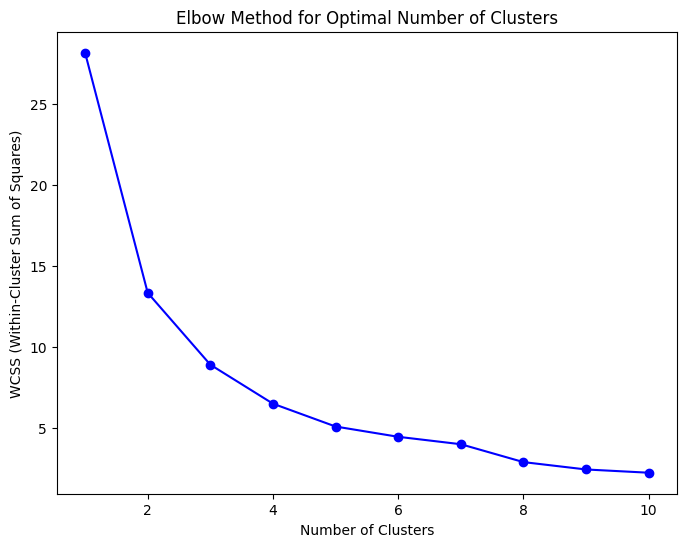

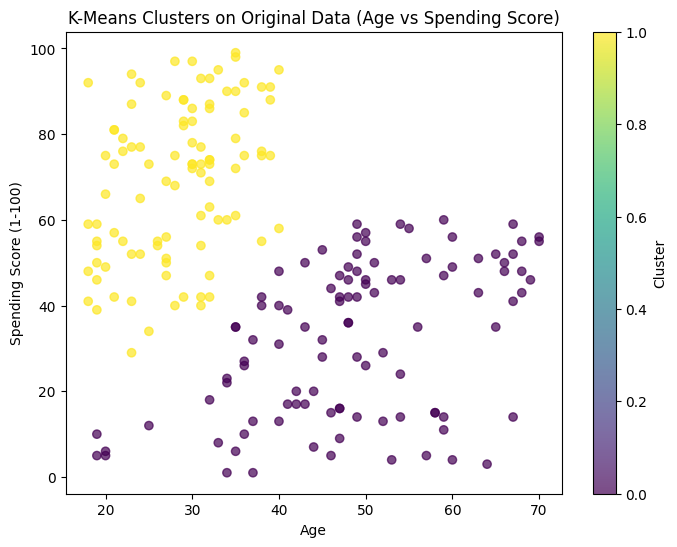

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# lets just renormalize the data but instead of the standard scaler we are using min max scaler because the k-means is more sensitive with scaling bc of the caclulation of euclidean distances
# therefore, minmax scaler scales between 0 to 1 which is probably better for values like annual income or spending score also preventing larger features dominate the clustering process
scaler2 = MinMaxScaler()
df_normalized2 = df_encoded[['Age','Spending Score (1-100)']]
df_normalized2 = scaler2.fit_transform(df_normalized2)

# now lets make an elbow method plot to find the best number of clusters
wcss = []  # list to hold WCSS values for different cluster counts - Within-Cluster Sum of Squares
# trying clustering for numbers of clusters from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_normalized2)
    wcss.append(kmeans.inertia_)  # inertia is the WCSS value, we are appending all of the results to our wcss list to go through and see which is the best
#plotting the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', color='blue')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

#based on our elbow plot here i feel like it is probably 2 or potentially 3
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_normalized2)

plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clusters on Original Data (Age vs Spending Score)')
plt.colorbar(label='Cluster')
plt.show()

Annual Income and Spending Score K-Means Clustering

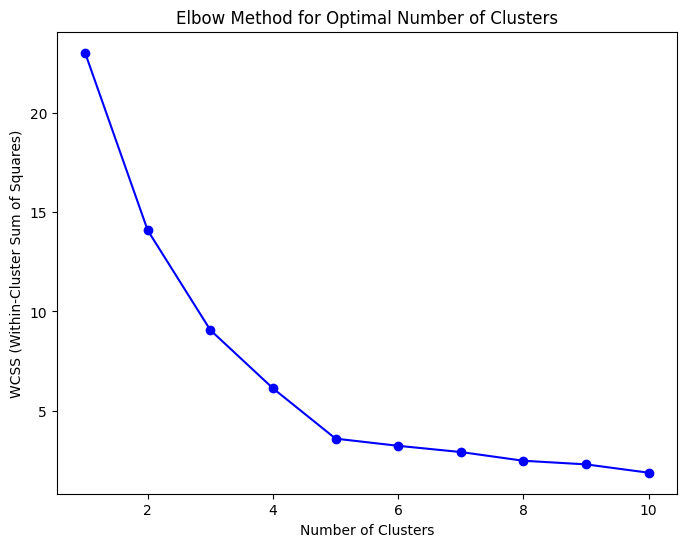

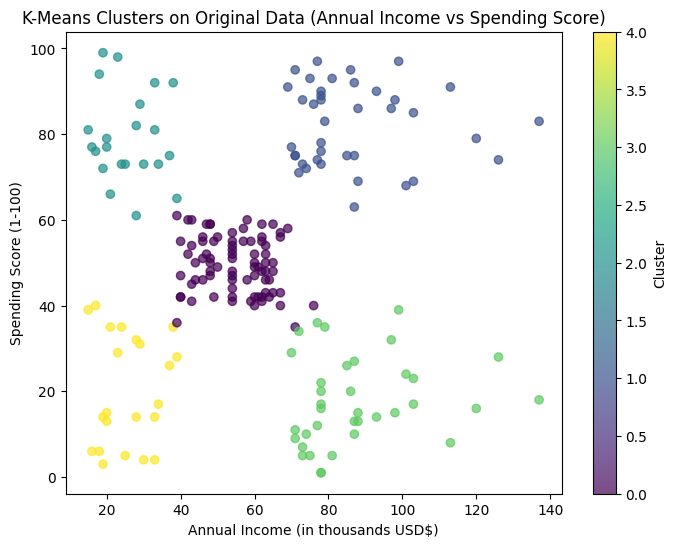

In [21]:
# redoing this but with annual income and spending score
scaler3 = MinMaxScaler()
df_copy = df.copy()
df_normalized3 = df_copy[['Annual Income (k$)','Spending Score (1-100)']]
df_normalized3 = scaler3.fit_transform(df_normalized3)

# now lets make an elbow method plot to find the best number of clusters
wcss = []
# trying clustering for numbers of clusters from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_normalized3)
    wcss.append(kmeans.inertia_)  # inertia is the WCSS value, we are appending all of the results to our wcss list to go through and see which is the best
#plotting the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', color='blue')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

#based on our elbow plot here i feel like it is 5
kmeans = KMeans(n_clusters=5, random_state=42)
df_copy['Cluster'] = kmeans.fit_predict(df_normalized3)

plt.figure(figsize=(8, 6))
plt.scatter(df_copy['Annual Income (k$)'], df_copy['Spending Score (1-100)'], c=df_copy['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Annual Income (in thousands USD$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clusters on Original Data (Annual Income vs Spending Score)')
plt.colorbar(label='Cluster')
plt.show()

Annual Income vs Age K Means Clustering

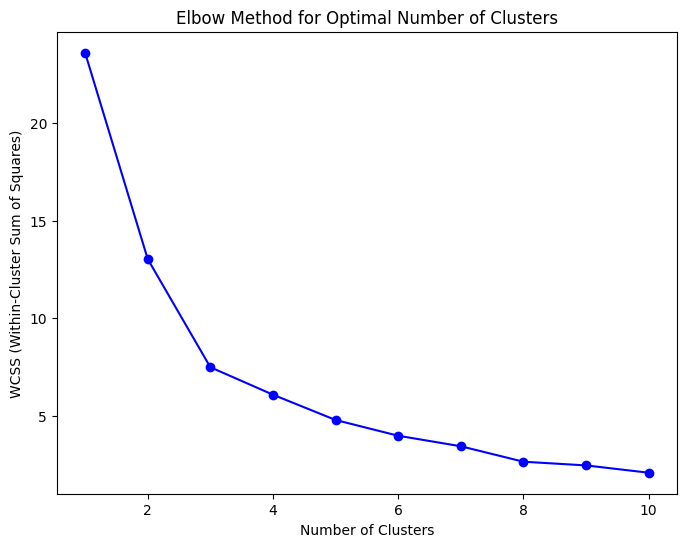

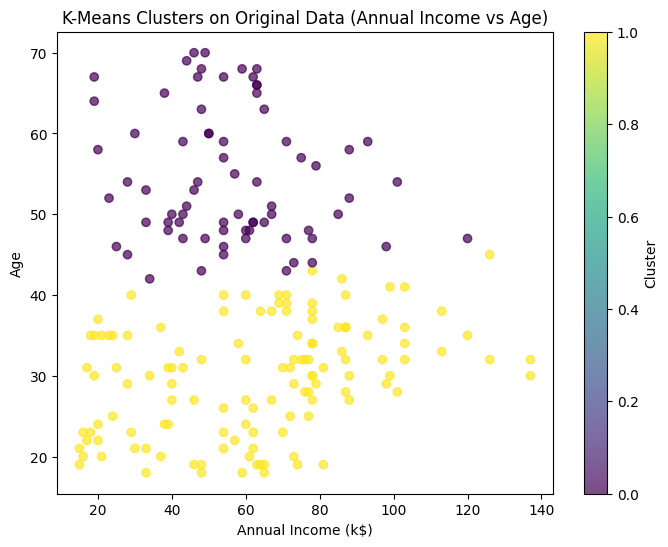

In [20]:
# redoing this but with annual income and age
scaler4 = MinMaxScaler()
df_copy4 = df.copy() #jumping to copy4 just so its easier when looking at the vars haha
df_normalized4 = df_copy4[['Annual Income (k$)','Age']]
df_normalized4 = scaler4.fit_transform(df_normalized4)

# now lets make an elbow method plot to find the best number of clusters
wcss = []
# trying clustering for numbers of clusters from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_normalized4)
    wcss.append(kmeans.inertia_)  # inertia is the WCSS value, we are appending all of the results to our wcss list to go through and see which is the best

#plotting the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', color='blue')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

#based on our elbow plot here i feel like it is 2 or 3
kmeans = KMeans(n_clusters=2, random_state=42) # i think 2 makes more sense visually
df_copy4['Cluster'] = kmeans.fit_predict(df_normalized4)

plt.figure(figsize=(8, 6))
plt.scatter(df_copy4['Annual Income (k$)'], df_copy4['Age'], c=df_copy4['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.title('K-Means Clusters on Original Data (Annual Income vs Age)')
plt.colorbar(label='Cluster')
plt.show()

#this kind of shows that regardless of age it does not have as much of an impact on annual income interestingly enough - you would almost assume that as someone gets older they would make more money . however you can see this more in the 20s to the 30s ages